In [1]:
import pandas as pd

df = pd.read_csv('final_weather_dataset.csv')
df_sample = df.sample(n=100000,random_state=42)


In [2]:
df.head()

,Date,Lat,Lon,AOD,Temp,RH,U wind,V wind,PBL,PM2.5
0,2024-01-01 10:00:00,30.0,70.00,0.574540,14.137360,50.088670,-0.873001,1.169403,702.2047,122.373702
1,2024-01-01 10:00:00,30.0,70.25,1.150714,16.274078,56.973180,-1.190384,1.214325,614.0797,192.220676
2,2024-01-01 10:00:00,30.0,70.50,0.931994,17.332672,60.022156,-0.748978,0.837372,661.3297,182.458503
3,2024-01-01 10:00:00,30.0,70.75,0.798658,17.567047,59.381570,-0.428665,0.497528,686.2047,133.370657
4,2024-01-01 10:00:00,30.0,71.00,0.356019,17.096344,56.585003,-0.499954,0.065887,686.7047,66.198735


In [3]:
features = ['AOD', 'Temp', 'RH', 'U wind', 'V wind', 'PBL']
X = df_sample[features]
y = df_sample['PM2.5']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(max_depth=20, random_state=42)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



RMSE: 10.31
R² Score: 0.95


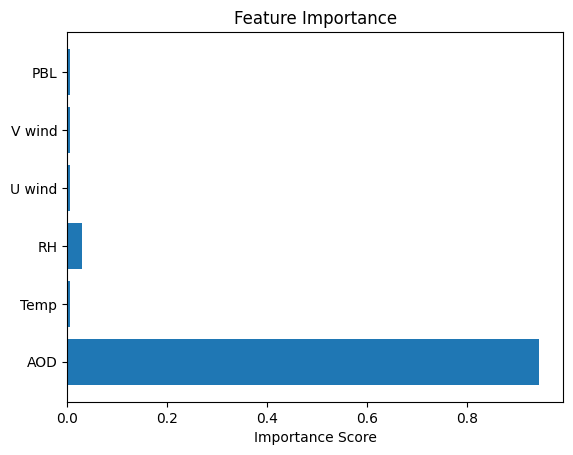

In [10]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


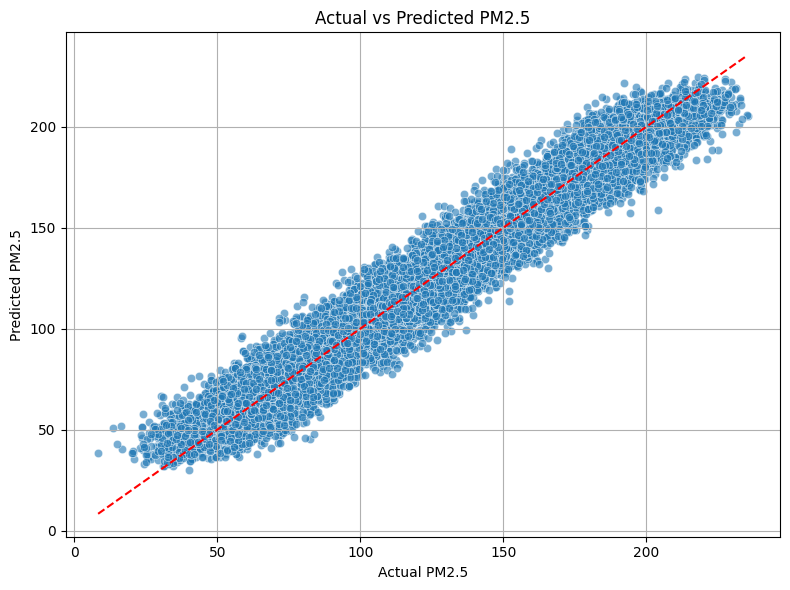

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=model.predict(X_test), alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
import joblib
joblib.dump(model, "rf_model.pkl")


['rf_model.pkl']